In [ ]:
#Aim of project:
    
#To understand the Target Customers and segment them into the most important shopping groups based on income, age and the 
#shopping score

In [1]:
#We begin by importing the necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate Analysis i.e looking at one variable from the dataset

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


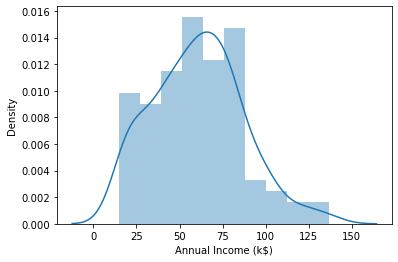

In [6]:
#visualizing Annual Income using a Histogram from the seaborn library

sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

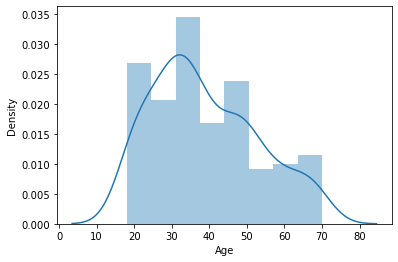

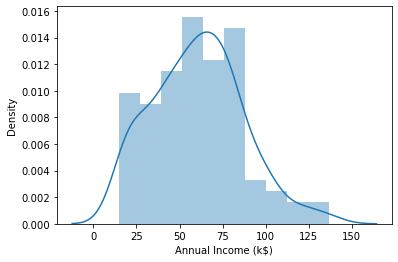

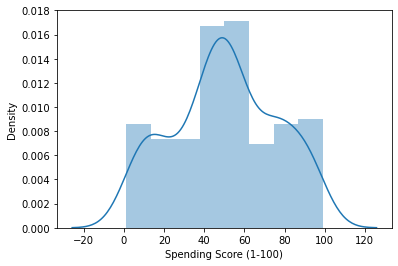

In [9]:
#Visualizing other variables using a for loop. a for loop is ideal for this so that we only do this once. This will be done using 
#only numeric variables.

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
           plt.figure()
           sns.distplot(df[i])

#The plots below match the data in the df.describe table above.

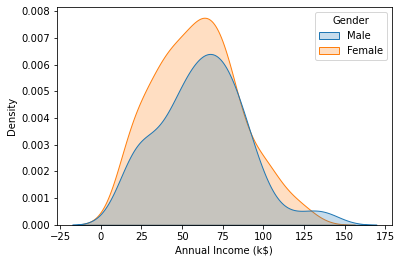

In [10]:
#Visualizing Annual Income by Gender
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

#Females are more than Males,and the distribution is unimodal. we also notice some extra tail at the end for Males which suggests some outlier(s)

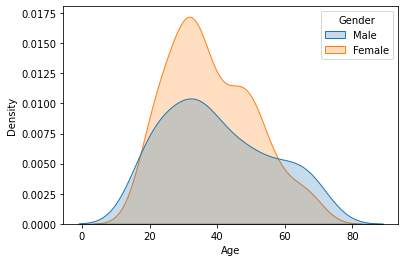

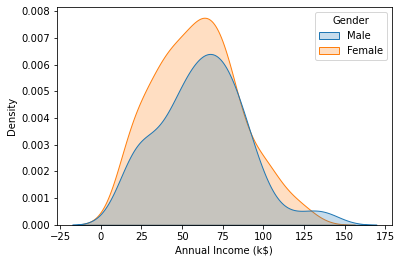

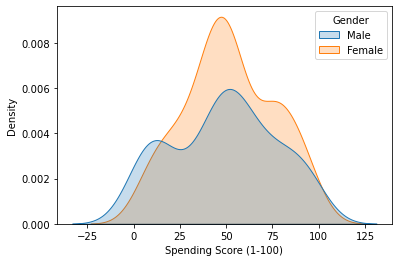

In [16]:
#Visualizing specific columns by Gender

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

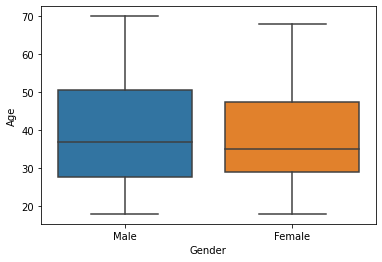

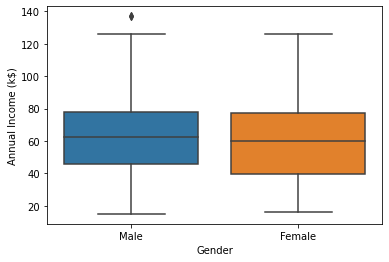

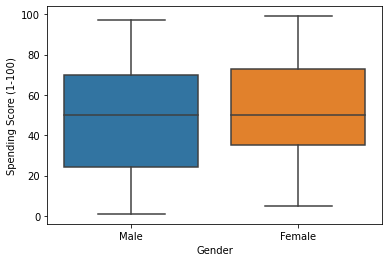

In [18]:
#Visualising specific columns by Gender but with a box plot for a bit more indepth analysis

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender', y=df[i])
    
#We also see the outlier in the Annual Income variable.

In [20]:
#Count of distribution of Gender
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [21]:
#Count of distribution of Gender by percentage(%)
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

### Bivariate Analysis

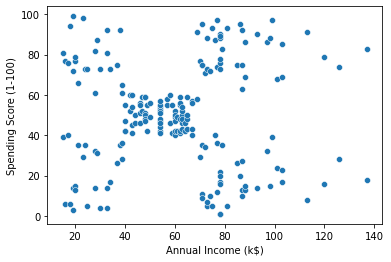

In [23]:
sns.scatterplot(data=df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)');

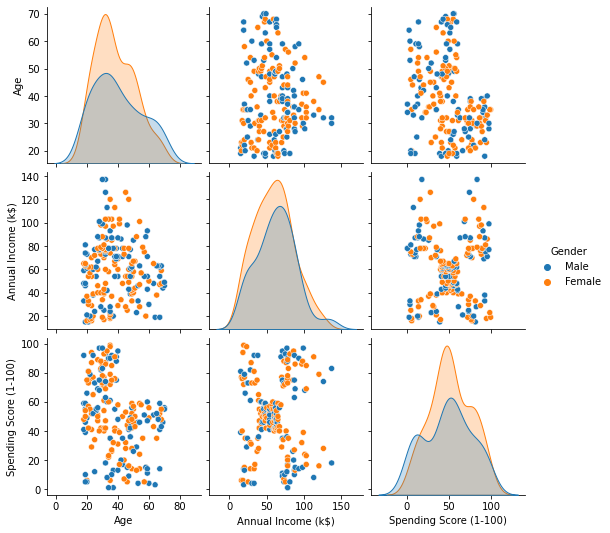

In [26]:
#Using a pairplot to visualize the scatterplots and histograms of the variables above
#df=df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')

In [29]:
#Looking at the MEAN values of Age, Annual Income and Spending Score distributed by Gender

df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [30]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

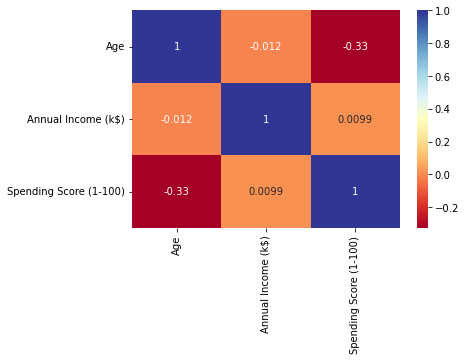

In [35]:
#Using a heatmap to visualize correlations.

sns.heatmap(df.corr(),annot=True,cmap='RdYlBu')

#### Clustering - Univariate 

In [53]:
#Initiating KMeans

clustering1 = KMeans(n_clusters=3)

In [54]:
#Fitting the data to the algorithm

clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [55]:
#looking at the cluster labels
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [56]:
#Adding the clustering labels to the dataframe

df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [57]:
#Quick look at how many customers fall in each cluster

df['Income Cluster'].value_counts()

1    92
0    72
2    36
Name: Income Cluster, dtype: int64

In [58]:
#Find out the ideal number of clusters required. Even though 8 is the standard for KMeans, first try 6; go back to  the KMeans 
#initializing code to add it in

#Then we'll use the ELBOW method to get the right cluster number.

In [59]:
#Getting the clustering inertia

#Inertia tells us how well the dataset is clustered using KMeans.

clustering1.inertia_

23528.152173913055

In [60]:
#Using a for loop to as an efficient way to check the clusters to know when we reach the right number.

inertia_scores = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)']])
    inertia_scores.append(km.inertia_)

In [61]:
inertia_scores

#with the inertia scores we can then plot them against the range above to get the right cluster no.from the elbow chart

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3976.358363858364,
 2871.629365079366,
 2233.4240609064145,
 1734.1677489177487]

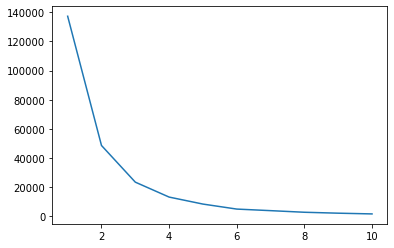

In [62]:
plt.plot(range(1,11), inertia_scores)

In [64]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [66]:
#Next we can do some further analysis: We can see what the MEAN values are for the Age/Spending Score/Annual Income of this cluster using a 
#groupby

df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,39.184783,66.717391,50.054348
2,37.833333,99.888889,50.638889


#### Bivariate Clustering
##### Using 2 variables; Annual Income and spending score

In [72]:
clustering2 = KMeans(n_clusters=5)

In [73]:
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,0
2,Female,20,16,6,0,4
3,Female,23,16,77,0,0
4,Female,31,17,40,0,4


In [74]:
inertia_scores2 = []
for i in range(1,11):
    km2 = KMeans(n_clusters=i)
    km2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(km2.inertia_)
    

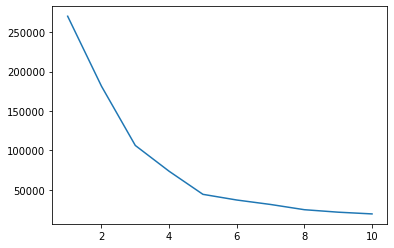

In [75]:
plt.plot(range(1,11),inertia_scores2)

In [76]:
#From the result on the elbow chart which is 5, we add 5 to the KMeans algorithm

In [83]:
#View the cluster centers
#In order to be able to add the 'x' and 'y' array of the cluster centers to the map below, we turn it into a dataframe
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

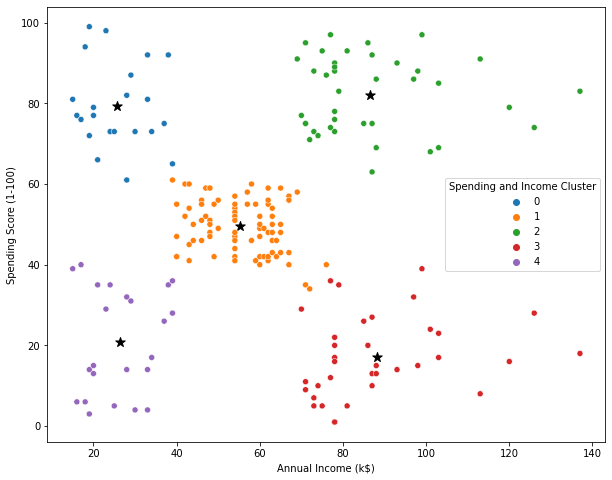

In [84]:
#Next we visualize using a scatterplot since we're analyzing 2 variables
plt.figure(figsize=(10,8)) #to make graph bigger
plt.scatter(x=centers['x'], y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x= 'Annual Income (k$)', y= 'Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [90]:
#Viewing the distribution of Male and Female across the 'Spending and Income Cluster'
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [92]:
#To drill down a bit more, we can look at the average age of the customers in the clusters; we want to look at the age of those in 
#Cluster 2.

df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [ ]:
#Analysis Results:

#From the graph, it is clear that the cluster to go for would be Cluster 2(green) as these customers have a high spending score 
#i.e they bring in the most money.
#and also high annual income.

#Another group to look at would be the cluster 0; customers with a high spending score but a low annual income. We can assume they
#buy during promotions and sales. And marketing campaigns can be created to target them too.More detail can be gotten about the
#items that they buy.